# Predict Developer Salary

In [549]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [550]:
# Read the Data set
df = pd.read_csv("./dev_salary_messy.csv")
df.head()

,age,gender,company,designation,skills,experience,salary
0,28.331308,Male,NaN,Full Stack Developer,"HTML,CSS,JS",8.252736,40625.331173
1,39.916441,Other,StartupX,Data Scientist,NaN,8.903539,NaN
2,23.192112,Other,TechNova,NaN,"Node,Express",15.199075,148039.692836
3,29.127131,Other,Google,Backend Developer,"Python,React",5.363792,40480.414028
4,35.288221,Male,NaN,Data Scientist,"Node,Express",5.033765,59498.149566


In [551]:
# Understand the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1600 non-null   float64
 1   gender       2000 non-null   object 
 2   company      1615 non-null   object 
 3   designation  1393 non-null   object 
 4   skills       1614 non-null   object 
 5   experience   2000 non-null   float64
 6   salary       1610 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


In [552]:
df.describe()

,age,experience,salary
count,1600.000000,2000.000000,1610.000000
mean,33.194284,9.552768,80632.680192
std,6.115570,4.816451,35436.588313
min,20.493596,0.816131,37050.892044
25%,28.769460,5.239910,41718.960229
50%,31.772166,8.164394,62030.592358
75%,39.526037,14.840576,100447.899715
max,42.927504,16.672358,153762.500250


### EDA

In [553]:
# first check the null values
total_null = df.isnull().sum()
total_null

age            400
gender           0
company        385
designation    607
skills         386
experience       0
salary         390
dtype: int64

In [554]:
# First fill out the age with median because if the age have outliers the median ignore it ,
age_median = df["age"].median()
df["age"] = df["age"].fillna(age_median)

# now fill all values of gender with mode
gender_mode = df["gender"].mode()
df["gender"] = df["gender"].fillna(gender_mode[0])
df["gender"] = df["gender"].str.replace("Other", gender_mode[0])

# now fill out the company with mode data
company_mode = df["company"].mode()
df["company"] = df["company"].fillna(company_mode[0])

# now fill out the designation with mode values
df["designation"] = df["designation"].fillna(df["designation"].mode()[0])


# fill skill values with python
df["skills"] = df["skills"].fillna("Python")


# fill experience with median
df["experience"] = df["experience"].fillna(df["experience"].median())


# need to predict the salary so drop salary row having null values
df = df.dropna(subset="salary")


# first check the null values
total_null = df.isnull().sum()
total_null


age            0
gender         0
company        0
designation    0
skills         0
experience     0
salary         0
dtype: int64

In [555]:
# now check the duplicates
total_duplicates = df.duplicated().sum()
total_duplicates 

np.int64(0)

In [556]:
# remove all duplicates
df = df.drop_duplicates()
total_duplicates = df.duplicated().sum()
total_duplicates 

np.int64(0)

In [557]:
df['gender'] = df['gender'].str.lower().str.strip()
df['company'] = df['company'].str.title().str.strip()
df['designation'] = df['designation'].str.title().str.strip()
df['skills'] = df['skills'].str.lower().str.strip().str.replace(";", ",")


## Exploratory Data Analysis

<Axes: xlabel='salary', ylabel='Count'>

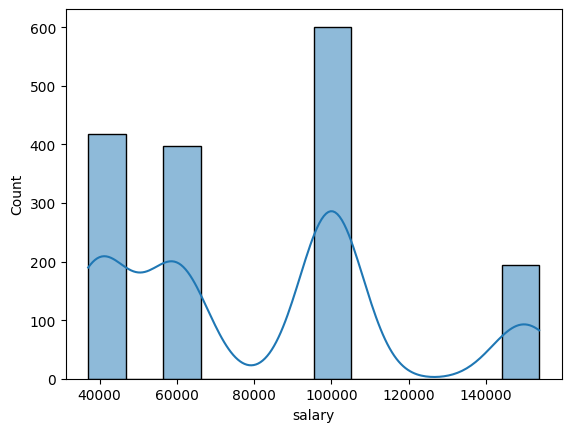

In [558]:
# Now check how the salary is Distribution
sns.histplot(df["salary"], kde=True)

<Axes: xlabel='experience', ylabel='salary'>

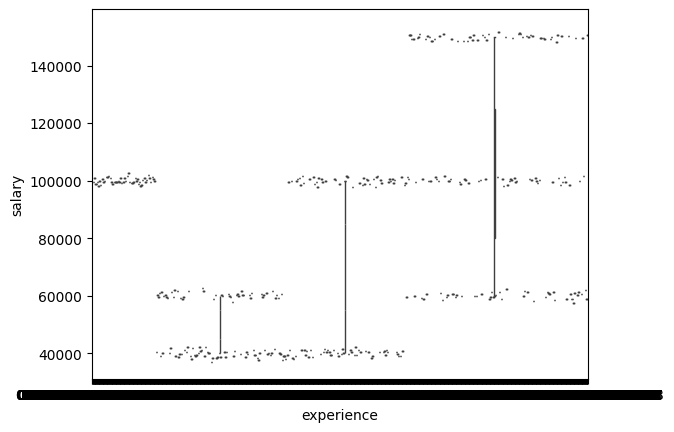

In [559]:
# check the distribution salary with experience
sns.boxplot(df , x="experience",y="salary")

<Axes: xlabel='gender', ylabel='salary'>

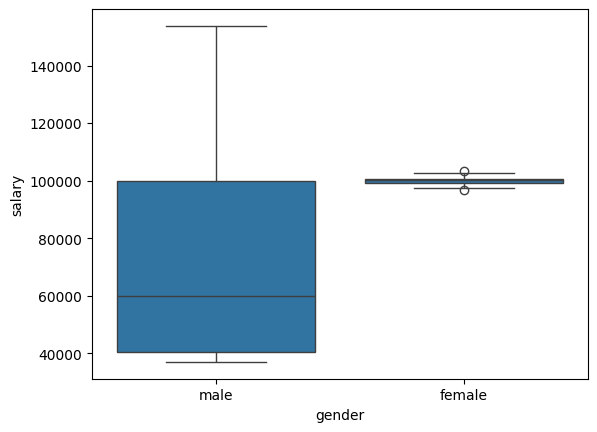

In [560]:
sns.boxplot(x='gender', y='salary', data=df)

<Axes: xlabel='age', ylabel='salary'>

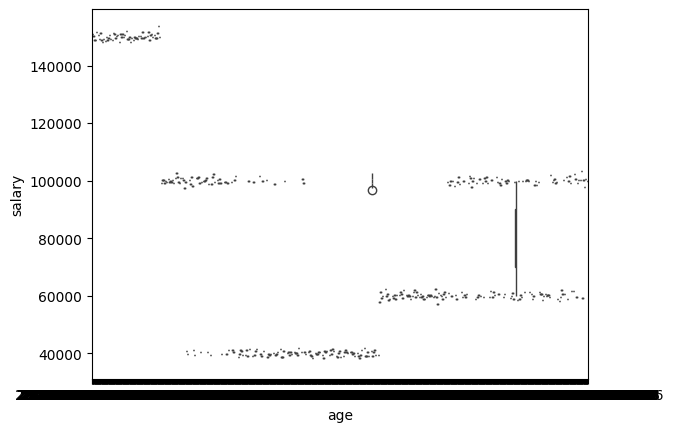

In [561]:
sns.boxplot(x='age', y='salary', data=df)

<Axes: xlabel='company', ylabel='salary'>

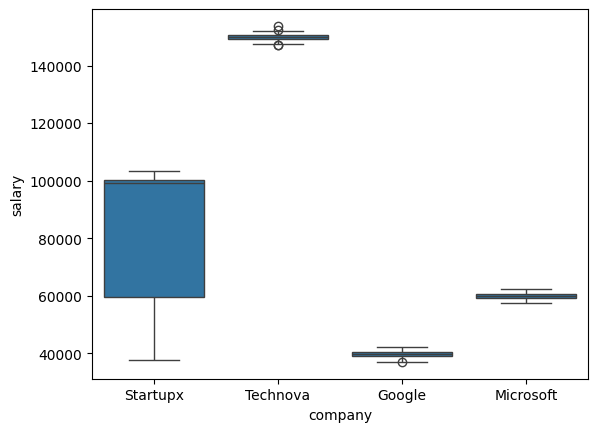

In [562]:
sns.boxplot(x='company', y='salary', data=df)


([0, 1, 2],
 [Text(0, 0, 'Full Stack Developer'),
  Text(1, 0, 'Backend Developer'),
  Text(2, 0, 'Data Scientist')])

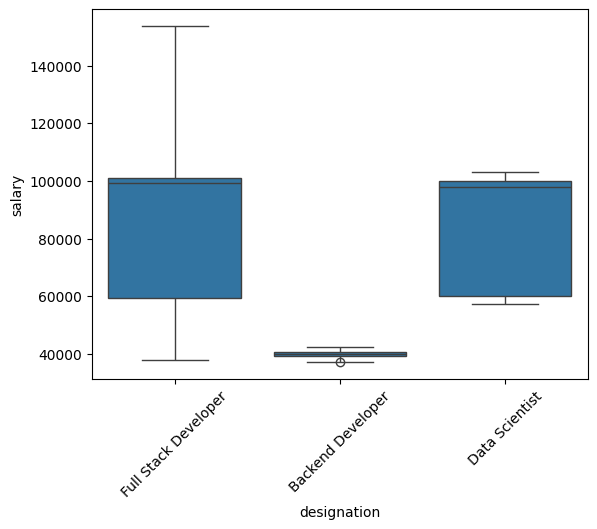

In [563]:
sns.boxplot(x='designation', y='salary', data=df)
plt.xticks(rotation=45)


<Axes: >

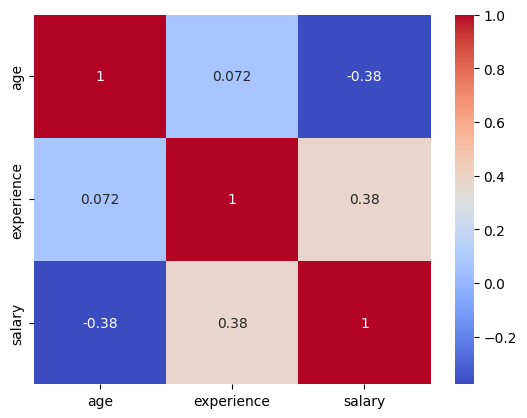

In [564]:
# correlation heat map
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=True , cmap='coolwarm')

In [565]:
skills_dummies = df['skills'].str.get_dummies(sep=',')
# sns.boxplot(df , x="main_skill",y="salary")
df = pd.concat([df, skills_dummies], axis=1)


In [566]:
categorical_cols = ['company',"designation","gender"]
df_encoded = pd.get_dummies(data=df , columns=categorical_cols , drop_first=True)
df_encoded = df_encoded.drop(columns=["skills"])


In [567]:
df_encoded

,age,experience,salary,css,express,html,java,js,node,python,react,spring,company_Microsoft,company_Startupx,company_Technova,designation_Data Scientist,designation_Full Stack Developer,gender_male
0,28.331308,8.252736,40625.331173,1,0,1,0,1,0,0,0,0,False,True,False,False,True,True
2,23.192112,15.199075,148039.692836,0,1,0,0,0,1,0,0,0,False,False,True,False,True,True
3,29.127131,5.363792,40480.414028,0,0,0,0,0,0,1,1,0,False,False,False,False,False,True
4,35.288221,5.033765,59498.149566,0,1,0,0,0,1,0,0,0,False,True,False,True,False,True
5,26.962389,2.503156,98506.027009,0,0,0,1,0,0,0,0,1,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,39.539795,14.914617,60658.337153,0,0,0,0,0,0,1,0,0,True,False,False,False,True,True
1995,30.495038,7.228638,41199.306849,1,0,1,0,1,0,0,0,0,False,True,False,False,True,True
1997,23.404449,15.487209,149238.080418,0,1,0,0,0,1,0,0,0,False,False,True,False,True,True
1998,30.094698,4.195188,40078.858953,0,0,0,0,0,0,1,1,0,False,False,False,False,False,True


In [568]:
df_encoded =  df_encoded.astype(int)
df_encoded

,age,experience,salary,css,express,html,java,js,node,python,react,spring,company_Microsoft,company_Startupx,company_Technova,designation_Data Scientist,designation_Full Stack Developer,gender_male
0,28,8,40625,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1
2,23,15,148039,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1
3,29,5,40480,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
4,35,5,59498,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1
5,26,2,98506,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,39,14,60658,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
1995,30,7,41199,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1
1997,23,15,149238,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1
1998,30,4,40078,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [569]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_scale = ["experience","age"]
df_encoded[columns_scale] = scaler.fit_transform(df_encoded[columns_scale])
df_encoded

,age,experience,salary,css,express,html,java,js,node,python,react,spring,company_Microsoft,company_Startupx,company_Technova,designation_Data Scientist,designation_Full Stack Developer,gender_male
0,-0.663028,-0.107918,40625,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1
2,-1.556612,1.309610,148039,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1
3,-0.484311,-0.715430,40480,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
4,0.587989,-0.715430,59498,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1
5,-1.020461,-1.322942,98506,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1.302856,1.107106,60658,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
1995,-0.305594,-0.310422,41199,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1
1997,-1.556612,1.309610,149238,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1
1998,-0.305594,-0.917934,40078,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [570]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["salary"])
Y = df_encoded["salary"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [571]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [572]:
y_predict = model.predict(X_test)
y_predict

array([ 60057.89306767,  59979.78852063,  39827.36326606,  60034.231226  ,
        60054.10701795, 100054.17267487,  40090.78871208,  39772.92056069,
        40044.23328728, 100046.99169767, 100039.10441711,  99968.88715063,
       100027.88169668,  60042.11850655, 149786.40263079, 100039.10441711,
        40052.12056784,  99918.99628596,  99999.7299695 , 149786.40263079,
        99945.9935675 , 149840.84533616, 149778.51535024,  60042.11850655,
       149832.9580556 , 100019.99441613,  99957.66443021,  59979.78852063,
        40052.12056784,  40036.34600672,  60038.33245684, 100012.10713557,
        99957.66443021,  99999.7299695 ,  99945.28726414,  60038.33245684,
       149887.40076096,  40044.23328728,  39749.25871902, 100035.76897724,
       149840.84533616,  59983.88975147,  60034.231226  ,  40090.78871208,
       149794.28991135, 149832.9580556 ,  99999.7299695 ,  39780.80784125,
        39765.03328014, 149794.28991135,  99973.43899132,  39827.36326606,
       149832.9580556 ,  

In [573]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_predict)
r2

0.9992013075146213

In [574]:
n = df_encoded.shape[0]
p = df_encoded.shape[1]
r2_2_adjust = 1 - ( (1 - r2) * (n - 1) / (n - p -1) )
r2_2_adjust

0.9991922713959935

In [576]:
import joblib

joblib.dump(model, 'final_model.pkl')

['final_model.pkl']

In [577]:
df_encoded.columns

Index(['age', 'experience', 'salary', 'css', 'express', 'html', 'java', 'js',
       'node', 'python', 'react', 'spring', 'company_Microsoft',
       'company_Startupx', 'company_Technova', 'designation_Data Scientist',
       'designation_Full Stack Developer', 'gender_male'],
      dtype='object')